In [433]:
import numpy as np
import pandas as pd
import os
from scipy.stats import pearsonr,spearmanr
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_rows', None)

In [434]:
x=pd.read_csv(r"C:\Users\rishi\ml_projects\climate\points_arr.csv",header=None).to_numpy()

In [435]:
def peri(arr,x=x):
    new_arr=[]
    arr=np.reshape(arr,(480,1))
    for i in range(len(arr)):
        if(x[i]==0):
            continue
        else:
            new_arr.append(arr[i])
    return np.array(new_arr)


In [436]:
exclude_vals=[]
total_count=-1
for i in range(2018, 2024):
    dir_path = fr"C:\Users\rishi\ml_projects\climate\{i}_data\NTL"
    filenames = os.listdir(dir_path)

    month_mapping = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }

    # Sort the filenames based on the month extracted from the filename
    sorted_filenames = sorted(filenames, key=lambda x: month_mapping[x.split('_')[0]])
    for filename in sorted_filenames:
        total_count+=1
        filepath = os.path.join(dir_path, filename)
        df = pd.read_csv(filepath, index_col=0)
        count=0
        for _, row in df.iterrows():
            count += (row == 0).sum()
        if(count>=df.shape[0]*df.shape[1]/5):
            exclude_vals.append(total_count)
            #print(print(f"year: {i} , month :{filename}, {total_count}"))
total_count=-6
for i in range(2018, 2024):
    dir_path = fr"C:\Users\rishi\ml_projects\climate\{i}_data\nlst_scaled"
    filenames = os.listdir(dir_path)

    month_mapping = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }

    # Sort the filenames based on the month extracted from the filename
    sorted_filenames = sorted(filenames, key=lambda x: month_mapping[x.split('_')[0]])
    for filename in sorted_filenames:
        total_count+=1
        filepath = os.path.join(dir_path, filename)
        df = pd.read_csv(filepath, index_col=0)
        count=0
        for _, row in df.iterrows():
            count += (row == 0).sum()
        if(count>=df.shape[0]*df.shape[1]/5):
            exclude_vals.append(total_count)
            #print(print(f"year: {i} , month :{filename}, {total_count}"))
exclude_vals=list(set(exclude_vals))
exclude_vals.sort()
exclude_vals

[1, 2, 13, 15, 25, 26, 39, 49, 61, 63]

In [437]:
months = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
total_count=-1
CO_all_vals = []
NO2_all_vals = []
O3_all_vals = []
SO2_all_vals = []
HCHO_all_vals = []
NLST_all_vals = []
NDVI_all_vals = []
NTL_all_vals = []

CO_Avg = []
NO2_Avg = []
O3_Avg = []
SO2_Avg = []
HCHO_Avg = []
NLST_Avg = []
NDVI_Avg = []
NTL_Avg = []


for year in range(2018,2024):

    for month in range(1,13):
        if(year == 2018 and month in range(1,6)):
            continue
        total_count+=1
        if(total_count in exclude_vals):
            continue
        CO_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\CO\{months[month]}_CO.csv")
        CO_df.drop("Unnamed: 0", axis=1, inplace=True)
        CO_vals = [val for sublist in CO_df.to_numpy() for val in sublist]
        CO_vals = peri(CO_vals)
        CO_all_vals.append(CO_vals)
        CO_Avg.append(np.mean(CO_vals))

        # Process NO2 data
        NO2_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\NO2\{months[month]}_NO2.csv")
        NO2_df.drop("Unnamed: 0", axis=1, inplace=True)
        NO2_df.interpolate(method='linear', inplace=True)
        NO2_vals = [val for sublist in NO2_df.to_numpy() for val in sublist]
        NO2_vals = peri(NO2_vals)  # Applying peri to NO2 values
        NO2_all_vals.append(NO2_vals)
        NO2_Avg.append(np.mean(NO2_vals))

        # Process O3 data
        O3_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\O3\{months[month]}_O3.csv")
        O3_df.drop("Unnamed: 0", axis=1, inplace=True)
        O3_vals = [val for sublist in O3_df.to_numpy() for val in sublist]
        O3_vals = peri(O3_vals)  # Applying peri to O3 values
        O3_all_vals.append(O3_vals)
        O3_Avg.append(np.mean(O3_vals))

        # Process SO2 data
        SO2_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\SO2\{months[month]}_SO2.csv")
        SO2_df.drop("Unnamed: 0", axis=1, inplace=True)
        SO2_vals = [val for sublist in SO2_df.to_numpy() for val in sublist]
        SO2_vals = peri(SO2_vals)  # Applying peri to SO2 values
        SO2_all_vals.append(SO2_vals)
        SO2_Avg.append(np.mean(SO2_vals))

        # Process HCHO data
        HCHO_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\HCHO\{months[month]}_HCHO.csv")
        HCHO_df.drop("Unnamed: 0", axis=1, inplace=True)
        HCHO_vals = [val for sublist in HCHO_df.to_numpy() for val in sublist]
        HCHO_vals = peri(HCHO_vals)  # Applying peri to HCHO values
        HCHO_all_vals.append(HCHO_vals)
        HCHO_Avg.append(np.mean(HCHO_vals))

        # Process NLST data
        NLST_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\nlst_scaled\{months[month]}_NLST.csv")
        NLST_df.drop("Unnamed: 0", axis=1, inplace=True)
        NLST_df.interpolate(method='linear', inplace=True)
        NLST_vals = [val for sublist in NLST_df.to_numpy() for val in sublist]
        NLST_vals = peri(NLST_vals)  # Applying peri to NLST values
        NLST_all_vals.append(NLST_vals)
        NLST_Avg.append(np.mean(NLST_vals))

        # Process NDVI data
        NDVI_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\ndvi_scaled\{months[month]}_NDVI.csv")
        NDVI_df.drop("Unnamed: 0", axis=1, inplace=True)
        NDVI_vals = [val for sublist in NDVI_df.to_numpy() for val in sublist]
        NDVI_vals = peri(NDVI_vals)  # Applying peri to NDVI values
        NDVI_all_vals.append(NDVI_vals)
        NDVI_Avg.append(np.mean(NDVI_vals))

        # Process NTL data
        NTL_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\NTL\{months[month]}_NTL.csv")
        NTL_df.drop("Unnamed: 0", axis=1, inplace=True)
        NTL_df.interpolate(method='linear', inplace=True)
        NTL_vals = [val for sublist in NTL_df.to_numpy() for val in sublist]
        NTL_vals = peri(NTL_vals)  # Applying peri to NTL values
        NTL_all_vals.append(NTL_vals)
        NTL_Avg.append(np.mean(NTL_vals))

In [438]:
print(np.shape(CO_all_vals))
CO_all_vals = [ele for sublist in CO_all_vals for ele in sublist]
NO2_all_vals = [ele for sublist in NO2_all_vals for ele in sublist]
O3_all_vals = [ele for sublist in O3_all_vals for ele in sublist]
SO2_all_vals = [ele for sublist in SO2_all_vals for ele in sublist]
HCHO_all_vals = [ele for sublist in HCHO_all_vals for ele in sublist]
NLST_all_vals = [ele for sublist in NLST_all_vals for ele in sublist]
NDVI_all_vals = [ele for sublist in NDVI_all_vals for ele in sublist]
NTL_all_vals = [ele for sublist in NTL_all_vals for ele in sublist]
print(np.shape(CO_all_vals))
print(np.shape(NO2_all_vals))
print(np.shape(O3_all_vals))
print(np.shape(SO2_all_vals))
print(np.shape(HCHO_all_vals))
print(np.shape(NLST_all_vals))
print(np.shape(NDVI_all_vals))
print(np.shape(NTL_all_vals))

(57, 80, 1)
(4560, 1)
(4560, 1)
(4560, 1)
(4560, 1)
(4560, 1)
(4560, 1)
(4560, 1)
(4560, 1)


In [439]:
CO_corr_nlst, CO_p_nlst = spearmanr(CO_all_vals, NLST_all_vals)
NO2_corr_nlst, NO2_p_nlst = spearmanr(NO2_all_vals, NLST_all_vals)
O3_corr_nlst, O3_p_nlst = spearmanr(O3_all_vals, NLST_all_vals)
SO2_corr_nlst, SO2_p_nlst = spearmanr(SO2_all_vals, NLST_all_vals)
HCHO_corr_nlst, HCHO_p_nlst = spearmanr(HCHO_all_vals, NLST_all_vals)

print("Spearman correlations with NLST:")
print(f"CO: Correlation = {CO_corr_nlst}")
print(f"NO2: Correlation = {NO2_corr_nlst}")
print(f"O3: Correlation = {O3_corr_nlst}")
print(f"SO2: Correlation = {SO2_corr_nlst}")
print(f"HCHO: Correlation = {HCHO_corr_nlst}")

Spearman correlations with NLST:
CO: Correlation = 0.14041263472417867
NO2: Correlation = 0.15351103128764382
O3: Correlation = 0.7072093366779283
SO2: Correlation = -0.1721637473334484
HCHO: Correlation = 0.39753861210157754


In [440]:
# Calculate Spearman correlations for each pollutant with NDVI
CO_corr_ndvi, CO_p_ndvi = spearmanr(CO_all_vals, NDVI_all_vals)
NO2_corr_ndvi, NO2_p_ndvi = spearmanr(NO2_all_vals, NDVI_all_vals)
O3_corr_ndvi, O3_p_ndvi = spearmanr(O3_all_vals, NDVI_all_vals)
SO2_corr_ndvi, SO2_p_ndvi = spearmanr(SO2_all_vals, NDVI_all_vals)
HCHO_corr_ndvi, HCHO_p_ndvi = spearmanr(HCHO_all_vals, NDVI_all_vals)

# Print the results for correlations with NDVI
print("\nSpearman correlations with NDVI:")
print(f"CO: Correlation = {CO_corr_ndvi}")
print(f"NO2: Correlation = {NO2_corr_ndvi}")
print(f"O3: Correlation = {O3_corr_ndvi}")
print(f"SO2: Correlation = {SO2_corr_ndvi}")
print(f"HCHO: Correlation = {HCHO_corr_ndvi}")



Spearman correlations with NDVI:
CO: Correlation = -0.46462597606023776
NO2: Correlation = -0.6290153905127567
O3: Correlation = 0.044515507042308486
SO2: Correlation = -0.22813221080806245
HCHO: Correlation = -0.45039026648233643


In [441]:
# Calculate Spearman correlations for each pollutant with NTL
CO_corr_ntl, CO_p_ntl = spearmanr(CO_all_vals, NTL_all_vals)
NO2_corr_ntl, NO2_p_ntl = spearmanr(NO2_all_vals, NTL_all_vals)
O3_corr_ntl, O3_p_ntl = spearmanr(O3_all_vals, NTL_all_vals)
SO2_corr_ntl, SO2_p_ntl = spearmanr(SO2_all_vals, NTL_all_vals)
HCHO_corr_ntl, HCHO_p_ntl = spearmanr(HCHO_all_vals, NTL_all_vals)

# Print the results for correlations with NTL
print("\nSpearman correlations with NTL:")
print(f"CO: Correlation = {CO_corr_ntl}")
print(f"NO2: Correlation = {NO2_corr_ntl}")
print(f"O3: Correlation = {O3_corr_ntl}")
print(f"SO2: Correlation = {SO2_corr_ntl}")
print(f"HCHO: Correlation = {HCHO_corr_ntl}")



Spearman correlations with NTL:
CO: Correlation = 0.06417226142305467
NO2: Correlation = 0.586535734665366
O3: Correlation = -0.03134062446587141
SO2: Correlation = 0.041892131601724225
HCHO: Correlation = 0.18480460800428683


In [442]:
columns = ['NLST', 'NTL', 'NDVI']
rows = ['CO', 'NO2', 'O3', 'SO2', 'HCHO']

# Create an empty DataFrame
correlation_df = pd.DataFrame(columns=columns)

# Populate the DataFrame with your correlation values
correlation_df.loc[0] = [CO_corr_nlst, CO_corr_ntl, CO_corr_ndvi]
correlation_df.loc[1] = [NO2_corr_nlst, NO2_corr_ntl, NO2_corr_ndvi]
correlation_df.loc[2] = [O3_corr_nlst, O3_corr_ntl, O3_corr_ndvi]
correlation_df.loc[3] = [SO2_corr_nlst, SO2_corr_ntl, SO2_corr_ndvi]
correlation_df.loc[4] = [HCHO_corr_nlst, HCHO_corr_ntl, HCHO_corr_ndvi]

# Display the DataFrame to confirm
print(correlation_df)




       NLST       NTL      NDVI
0  0.140413  0.064172 -0.464626
1  0.153511  0.586536 -0.629015
2  0.707209 -0.031341  0.044516
3 -0.172164  0.041892 -0.228132
4  0.397539  0.184805 -0.450390


          HCHO        O3       NO2        CO       SO2      NLST      NDVI  \
HCHO  1.000000  0.113616  0.524189  0.627323  0.249817  0.164324 -0.435854   
O3    0.113616  1.000000 -0.280989 -0.249953 -0.348883 -0.023536  0.112926   
NO2   0.524189 -0.280989  1.000000  0.501250  0.291346  0.138468 -0.580464   
CO    0.627323 -0.249953  0.501250  1.000000  0.433880  0.232811 -0.470632   
SO2   0.249817 -0.348883  0.291346  0.433880  1.000000  0.091829 -0.236862   
NLST  0.164324 -0.023536  0.138468  0.232811  0.091829  1.000000 -0.081821   
NDVI -0.435854  0.112926 -0.580464 -0.470632 -0.236862 -0.081821  1.000000   
NTL   0.158379 -0.040966  0.598888  0.060949  0.042882  0.018890 -0.368276   

           NTL  
HCHO  0.158379  
O3   -0.040966  
NO2   0.598888  
CO    0.060949  
SO2   0.042882  
NLST  0.018890  
NDVI -0.368276  
NTL   1.000000  


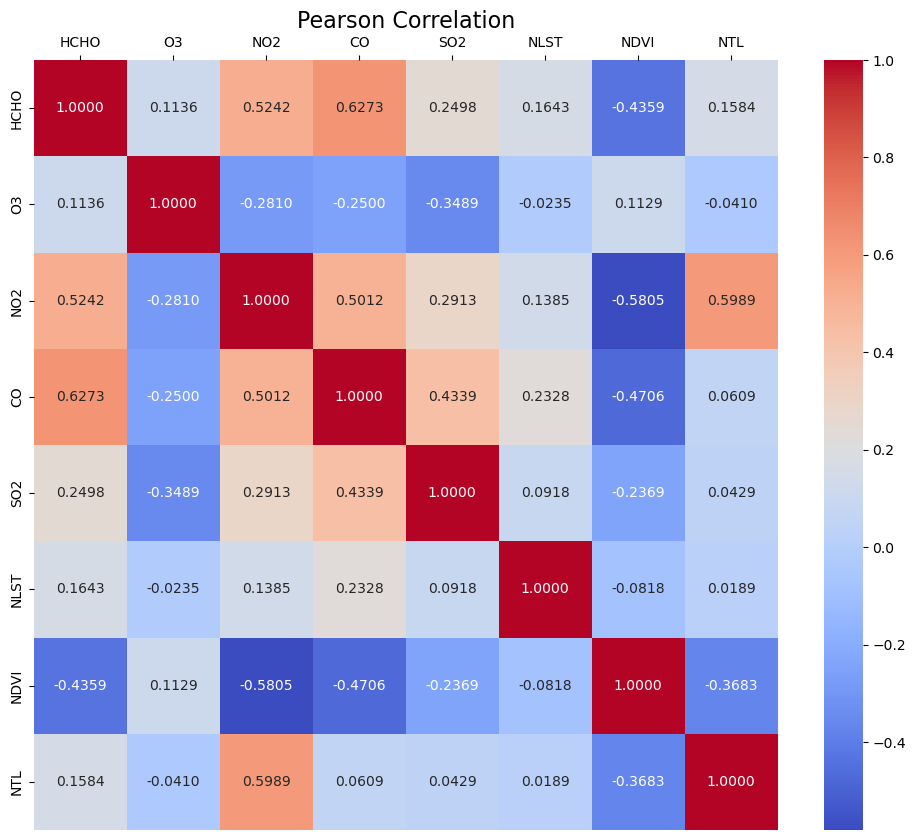

In [443]:
data = pd.DataFrame({
    'HCHO': HCHO_all_vals,
    'O3': O3_all_vals,
    'NO2': NO2_all_vals,
    'CO': CO_all_vals,
    'SO2': SO2_all_vals,
    'NLST': NLST_all_vals,
    'NDVI': NDVI_all_vals,
    'NTL' : NTL_all_vals
})

# Calculate the correlation matrix
correlation_matrix = data.corr(method='pearson')
cols=correlation_matrix.columns.tolist()
plt.figure(figsize=(12,10))
ax=sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", xticklabels=cols, yticklabels=cols,fmt=".4f")
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.title('Pearson Correlation',fontsize=16)
# Display the correlation matrix
print(correlation_matrix)

          HCHO        O3       NO2        CO       SO2      NLST      NDVI  \
HCHO  1.000000  0.127295  0.552433  0.620680  0.259412  0.397539 -0.450390   
O3    0.127295  1.000000 -0.236289 -0.222760 -0.350333  0.707209  0.044516   
NO2   0.552433 -0.236289  1.000000  0.529183  0.301608  0.153511 -0.629015   
CO    0.620680 -0.222760  0.529183  1.000000  0.431028  0.140413 -0.464626   
SO2   0.259412 -0.350333  0.301608  0.431028  1.000000 -0.172164 -0.228132   
NLST  0.397539  0.707209  0.153511  0.140413 -0.172164  1.000000 -0.331218   
NDVI -0.450390  0.044516 -0.629015 -0.464626 -0.228132 -0.331218  1.000000   
NTL   0.184805 -0.031341  0.586536  0.064172  0.041892  0.159923 -0.336388   

           NTL  
HCHO  0.184805  
O3   -0.031341  
NO2   0.586536  
CO    0.064172  
SO2   0.041892  
NLST  0.159923  
NDVI -0.336388  
NTL   1.000000  


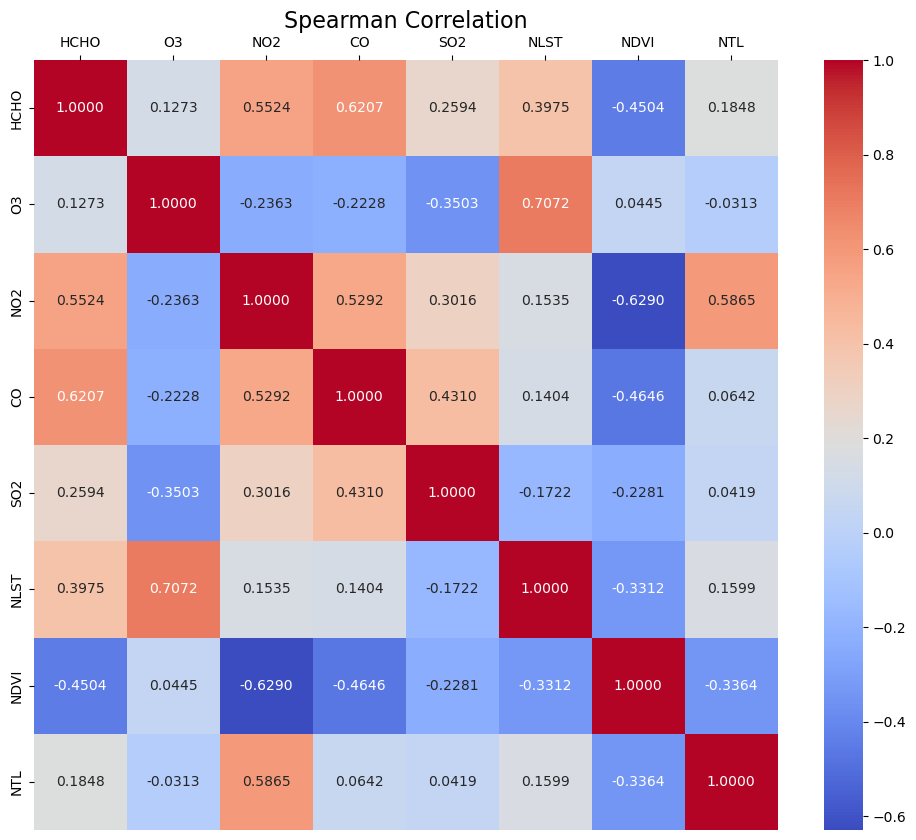

In [444]:
data = pd.DataFrame({
    'HCHO': HCHO_all_vals,
    'O3': O3_all_vals,
    'NO2': NO2_all_vals,
    'CO': CO_all_vals,
    'SO2': SO2_all_vals,
    'NLST': NLST_all_vals,
    'NDVI': NDVI_all_vals,
    'NTL' : NTL_all_vals
})

# Calculate the correlation matrix
correlation_matrix = data.corr(method='spearman')
cols=correlation_matrix.columns.tolist()
plt.figure(figsize=(12,10))
ax=sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", xticklabels=cols, yticklabels=cols,fmt=".4f")
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.title('Spearman Correlation',fontsize=16)
# Display the correlation matrix
print(correlation_matrix)

In [445]:
def scale(array):
    array=np.array(array)
    new_array=(array - array.min()) / (array.max() - array.min())
    return new_array

In [446]:
CO_scaled = scale(CO_Avg)
NO2_scaled = scale(NO2_Avg)
O3_scaled = scale(O3_Avg)
SO2_scaled = scale(SO2_Avg)
HCHO_scaled = scale(HCHO_Avg)
NLST_scaled = scale(NLST_Avg)
NDVI_scaled = scale(NDVI_Avg)
NTL_scaled = scale(NTL_Avg)


In [447]:
avg_pollution=(HCHO_scaled+O3_scaled+NO2_scaled+CO_scaled+SO2_scaled)/5
indicators=[]

for i in range(len(HCHO_scaled)):
    ind=[NDVI_scaled[i],NLST_scaled[i],NTL_scaled[i]]
    indicators.append(np.array(ind))
indicators=np.array(indicators)

model = LinearRegression()

# Fit the model
model.fit(indicators,avg_pollution)

print(f"Coefficients: NDVI: {round(model.coef_[0],8)} , NLST: {round(model.coef_[1],8)} , NTL: {round(model.coef_[2],8)}")
print(f"Average Air pollution = {round(model.coef_[0],8)} NDVI + {round(model.coef_[1],8)} NLST + {round(model.coef_[2],8)} NTL ")

Coefficients: NDVI: -0.36849076 , NLST: 0.24768784 , NTL: 0.14398497
Average Air pollution = -0.36849076 NDVI + 0.24768784 NLST + 0.14398497 NTL 


In [448]:

def fit_and_display(pollutant_vals, pollutant_name):
    model = LinearRegression()
    model.fit(indicators, pollutant_vals)
    
    # Output regression coefficients for each pollutant
    print(f"{pollutant_name} = {round(model.coef_[0], 8)} NDVI + {round(model.coef_[1], 8)} NLST + {round(model.coef_[2], 8)} NTL")
    #print(f"Intercept: {round(model.intercept_, 8)}\n")

# Fit and display results for each pollutant
fit_and_display(HCHO_scaled, 'HCHO')
fit_and_display(O3_scaled, 'O3')
fit_and_display(NO2_scaled, 'NO2')
fit_and_display(CO_scaled, 'CO')
fit_and_display(SO2_scaled, 'SO2')

HCHO = -0.54803399 NDVI + 0.3828016 NLST + 0.12713639 NTL
O3 = 0.10518881 NDVI + 0.0220725 NLST + -0.20184804 NTL
NO2 = -0.66272725 NDVI + 0.25206112 NLST + 0.34589634 NTL
CO = -0.47423755 NDVI + 0.42553495 NLST + 0.0817874 NTL
SO2 = -0.26264385 NDVI + 0.15596901 NLST + 0.36695277 NTL
